In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from rake_nltk import Rake
from tensorflow.keras.preprocessing.text import Tokenizer

from library import gaussian_naive_bayes_trainer


/home/cela/.local/programs/anaconda3/envs/scientificProject/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/cela/.local/programs/anaconda3/envs/scientificProject/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'libc10_cuda.so: cannot open shared object file: No such file or directory'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/home/cela/.local/programs/anaconda3/envs/scientificProject/lib/python3.8/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespa

# Training Models


In [2]:
EMBEDDING_DIM = 50
END = 100
NUM_FOLDS = 10
RANDOM_SEED = 42

PATH_CSV = 'data/anastasia.csv'
PATH_GLOVE_50D = 'models/glove.6B/glove.6B.50d.txt'
PATH_GLOVE_100D = 'models/glove.6B/glove.6B.100d.txt'
PATH_GLOVE_200D = 'models/glove.6B/glove.6B.200d.txt'
PATH_GLOVE_300D = 'models/glove.6B/glove.6B.300d.txt'

print("Hello World!")


Hello World!


In [3]:
data = pd.read_csv(filepath_or_buffer=PATH_CSV)


In [4]:
accuracies = {}
models = {}


In [5]:
# create the dict.
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['full_text'])

# number of unique words in dict.
print(f"Number of unique words in dictionary:\t{len(tokenizer.word_index)}")


Number of unique words in dictionary:	54267


> # Naïve Bayes 50D


In [6]:
model_dict = gaussian_naive_bayes_trainer(
    model_path=PATH_GLOVE_50D,
    tokenizer=tokenizer,
    embedding_dim=50,
    texts=data['full_text'],
    target=data['Related'],
    cv=NUM_FOLDS,
    random_state=RANDOM_SEED,
    test_size=0.4
)

models['Naïve Bayes 50D'] = model_dict


> # Naïve Bayes 100D


In [7]:
model_dict = gaussian_naive_bayes_trainer(
    model_path=PATH_GLOVE_100D,
    tokenizer=tokenizer,
    embedding_dim=100,
    texts=data['full_text'],
    target=data['Related'],
    cv=NUM_FOLDS,
    random_state=RANDOM_SEED,
    test_size=0.4
)

models['Naïve Bayes 100D'] = model_dict


> # Naïve Bayes 200D


In [8]:
model_dict = gaussian_naive_bayes_trainer(
    model_path=PATH_GLOVE_200D,
    tokenizer=tokenizer,
    embedding_dim=200,
    texts=data['full_text'],
    target=data['Related'],
    cv=NUM_FOLDS,
    random_state=RANDOM_SEED,
    test_size=0.4
)

models['Naïve Bayes 200D'] = model_dict


> # Naïve Bayes 300D


In [9]:
model_dict = gaussian_naive_bayes_trainer(
    model_path=PATH_GLOVE_300D,
    tokenizer=tokenizer,
    embedding_dim=300,
    texts=data['full_text'],
    target=data['Related'],
    cv=NUM_FOLDS,
    random_state=RANDOM_SEED,
    test_size=0.4
)

models['Naïve Bayes 300D'] = model_dict


# Evaluation


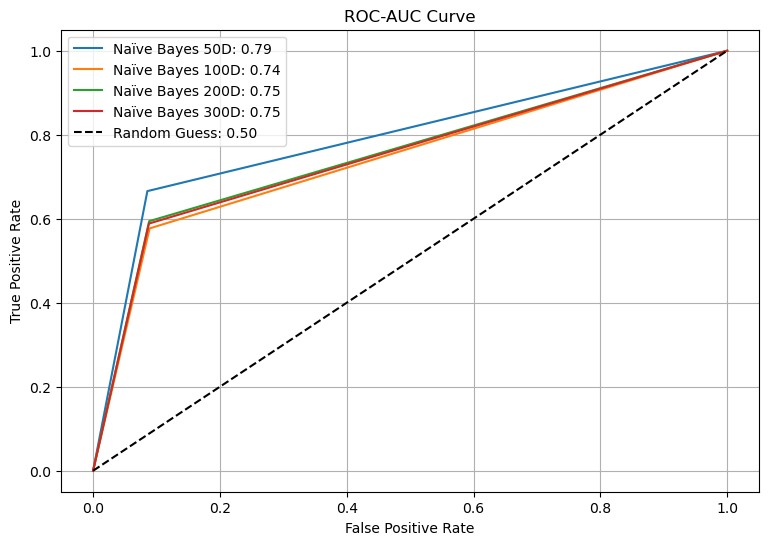

In [10]:
plt.figure(figsize=(9, 6))

for name, model_dict in models.items():
    plt.plot(
        model_dict['fpr'], model_dict['tpr'],
        label=f"{name}: {model_dict['roc_auc']:.2f}"
    )

plt.title('ROC-AUC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess: 0.50')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
max_auc = 0.
optimal_gnb = ''

for name, model in models.items():
    if models[name]['roc_auc'] > max_auc:
        max_auc = models[name]['roc_auc']
        optimal_gnb = model


In [21]:
import joblib

joblib.dump(optimal_gnb, 'models/optimal_gnb.pkl', compress=9)
model = joblib.load('models/optimal_gnb.pkl')
model

{'cv_score': 0.7843261622627231,
 'test_accuracy': 0.7900753715945934,
 'fpr': array([0.       , 0.0855615, 1.       ]),
 'tpr': array([0.        , 0.66571224, 1.        ]),
 'roc_auc': 0.7900753715945935,
 'model': GaussianNB(),
 'embedding_matrix': array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.41800001,  0.24968   , -0.41242   , ..., -0.18411   ,
         -0.11514   , -0.78580999],
        [ 0.68046999, -0.039263  ,  0.30186   , ..., -0.073297  ,
         -0.064699  , -0.26043999],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.33842   ,  0.30818   , -1.01250005, ...,  0.37522   ,
         -0.11374   ,  0.46757001],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]])}

# Extra

In [12]:
# Create a Rake instance
r = Rake()

# Text from which keywords will be extracted
text = data['full_text'][3242]

print(text)

# Extract keywords from the text
r.extract_keywords_from_text(text)

# Get the ranked keywords
keywords = r.get_ranked_phrases_with_scores()

# Print the extracted keywords and their scores
for score, kw in keywords:
    print("Keyword:", kw, "Score:", score)


Windows Internet Key Exchange (IKE) Protocol Extensions Remote Code Execution Vulnerability. This CVE ID is unique from CVE-2022-34721.
Keyword: protocol extensions remote code execution vulnerability Score: 36.0
Keyword: windows internet key exchange Score: 16.0
Keyword: cve id Score: 3.5
Keyword: cve Score: 1.5
Keyword: unique Score: 1.0
Keyword: ike Score: 1.0
Keyword: 34721 Score: 1.0
Keyword: 2022 Score: 1.0
